<a href="https://colab.research.google.com/github/AbdullahAkyuzz/Makine-0grnmesi-Final-Projesi-/blob/main/Colaboratory'ye_Ho%C5%9F_Geldiniz_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

Naive Bayes Sınıflandırıcısı Performansı:
Doğruluk (Accuracy): 0.7229437229437229
Konfüzyon Matrisi:
[[126  25]
 [ 39  41]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       151
           1       0.62      0.51      0.56        80

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.72       231



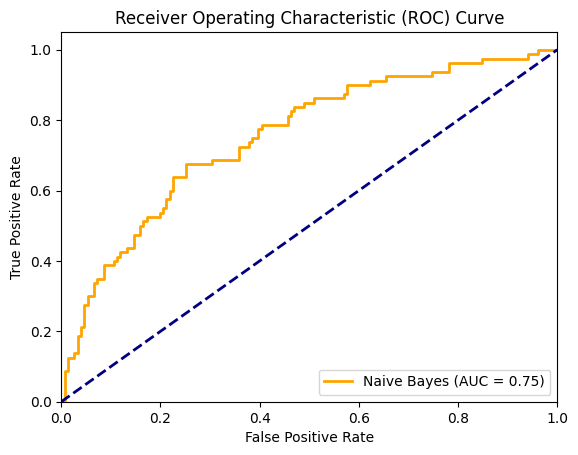


K-en Yakın Komşuluk Sınıflandırıcısı Performansı:
Doğruluk (Accuracy): 0.7012987012987013
Konfüzyon Matrisi:
[[125  26]
 [ 43  37]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       151
           1       0.59      0.46      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



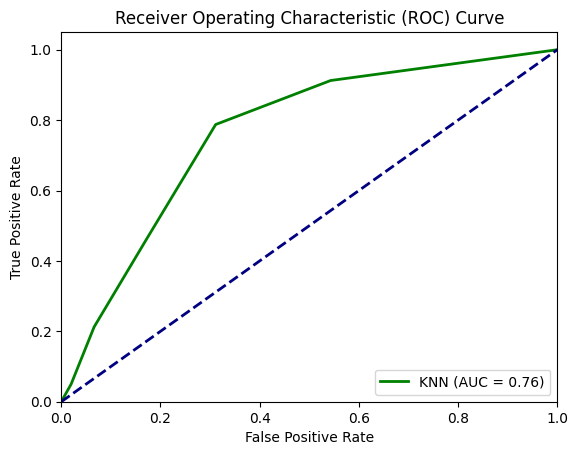

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Multi-Layer Perceptron (MLP) Sınıflandırıcısı Performansı:
Doğruluk (Accuracy): 0.7445887445887446
Konfüzyon Matrisi:
[[124  27]
 [ 32  48]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



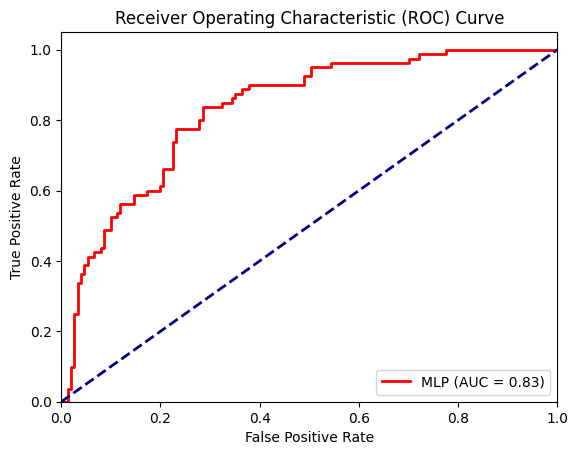


Destek Vektör Makineleri (SVM) Sınıflandırıcısı Performansı:


<function print>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Link bazen güncelliğini kaybediyor çalıştırmadan önce güncellemek lazım
# Veri setini URL'den yükledik
url = "https://s3.cloud.ngn.com.tr/clu3-40/course/461189/activity/479719/veri-seti.txt?AWSAccessKeyId=ALMS%3aalms-storage%40advancity.com.tr&Expires=1717486637&Signature=ylSwNCfK7m2TPAPF9ih6dnXfuzY%3d"
data = pd.read_csv(url, sep='\t')  # Sütunları tab ile ayır

# Verinin ilk birkaç satırını göster
print(data.head())

# Veri setini özellikler (X) ve hedef değişken (y) olarak ayıralım
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Veri setini eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Naive Bayes Sınıflandırıcısı
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
print("\nNaive Bayes Sınıflandırıcısı Performansı:")
print("Doğruluk (Accuracy):", nb_accuracy)
print("Konfüzyon Matrisi:")
print(nb_conf_matrix)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, nb_predictions))

# Naive Bayes için ROC eğrisi
nb_probs = nb_classifier.predict_proba(X_test)
nb_probs = nb_probs[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

plt.figure()
plt.plot(nb_fpr, nb_tpr, color='orange', lw=2, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. K-en Yakın Komşuluk (KNN) Sınıflandırıcısı
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Başlangıç için k=5
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
print("\nK-en Yakın Komşuluk Sınıflandırıcısı Performansı:")
print("Doğruluk (Accuracy):", knn_accuracy)
print("Konfüzyon Matrisi:")
print(knn_conf_matrix)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, knn_predictions))

# KNN için ROC eğrisi
knn_probs = knn_classifier.predict_proba(X_test)
knn_probs = knn_probs[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

plt.figure()
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label='KNN (AUC = %0.2f)' % knn_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Multi-Layer Perceptron (MLP) Sınıflandırıcısı
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)
print("\nMulti-Layer Perceptron (MLP) Sınıflandırıcısı Performansı:")
print("Doğruluk (Accuracy):", mlp_accuracy)
print("Konfüzyon Matrisi:")
print(mlp_conf_matrix)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, mlp_predictions))

# MLP için ROC eğrisi
mlp_probs = mlp_classifier.predict_proba(X_test)
mlp_probs = mlp_probs[:, 1]
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
mlp_auc = auc(mlp_fpr, mlp_tpr)

plt.figure()
plt.plot(mlp_fpr, mlp_tpr, color='red', lw=2, label='MLP (AUC = %0.2f)' % mlp_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 5. Destek Vektör Makineleri (SVM) Sınıflandırıcısı
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("\nDestek Vektör Makineleri (SVM) Sınıflandırıcısı Performansı:")
print
